## Learning Lyapunov function for Inverted Pendulum

In [7]:

#from dreal import *
#from Functions import *
#import torch
#import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [8]:
mat = scipy.io.loadmat('vdot_sos_case3.mat')

vdot_value = mat['val']

dim_temp = vdot_value.shape
dim_temp = np.asarray(dim_temp)
      
dim_y = dim_temp[0]
dim_x = dim_temp[1]

# For Case1,2
xd = np.linspace(-2,2,dim_x)
yd = np.linspace(-2,2,dim_y)
# For Case3
# xd = np.linspace(-2*np.pi,2*np.pi,dim_x)
# yd = np.linspace(-9,9,dim_y)

X, Y = np.meshgrid(xd, yd)

vdot_violation = []


for i in range(dim_y):
  for j in range(dim_x):
    if( vdot_value[i][j] > 0):
      vdot_violation.append([yd[i], xd[j]])

    
print(np.amax(vdot_value))
vdot_violation_np = np.array(vdot_violation)


18.09564534067499


160500
(160500, 2)


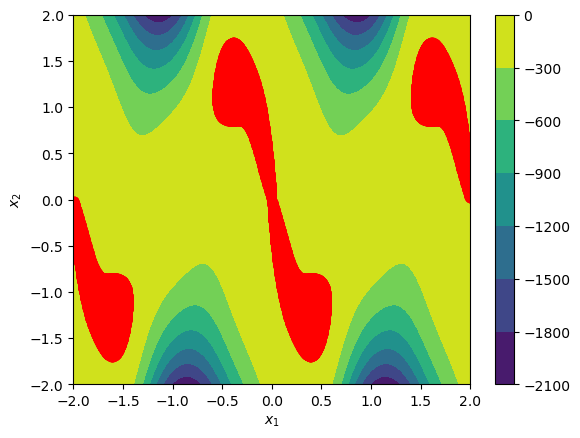

In [9]:
k = 0

# For Case1,2
xd = np.linspace(-2,2,dim_x)
zd = np.linspace(-2,2,dim_y)
# For Case3
# xd = np.linspace(-2*np.pi,2*np.pi,dim_x)
# zd = np.linspace(-9,9,dim_y)

X, Y = np.meshgrid(xd, zd)

for i in range(dim_y):
  for j in range(dim_x):
    if(vdot_value[i][j] > 0):
      k = k+1
      vdot_value[i][j] = 0
print(k)

print(vdot_violation_np.shape)
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, vdot_value)
cbar = fig.colorbar(cs)
#For Case1,2
plt.xlim([-2,2])
plt.ylim([-2,2])
#For Case3
# plt.xlim([-2*np.pi,2*np.pi])
# plt.ylim([-9, 9])

# Comment the following line if re-generate drccp results, since there is no red area
plt.scatter(vdot_violation_np[:,1],vdot_violation_np[:,0], color = 'red')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.savefig('sos_case3', dpi = 150)
plt.show()